In [1]:
import sys
import os
import json
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt

#from torch import nn
from pathlib import Path
from typing import Union

sys.path.append(os.path.expanduser('~/Documents/Medley'))
from Medley.interpretation import all_expids, predselpath, return_experiments, find_experiments_with, return_unique_values, load_pred_results, compare_scores

In [2]:
ids = find_experiments_with(keyval_dict={'scoring':'r2','startyear':1950})

In [3]:
ids

{'0feaf5a9de',
 '36bec5369d',
 '9809047ebb',
 'ae76a06410',
 'deb4021d58',
 'fc60bee6df',
 'fd62b92eda'}

In [4]:
test = compare_scores(ids, cv = False)

<Axes: xlabel='npredictors'>

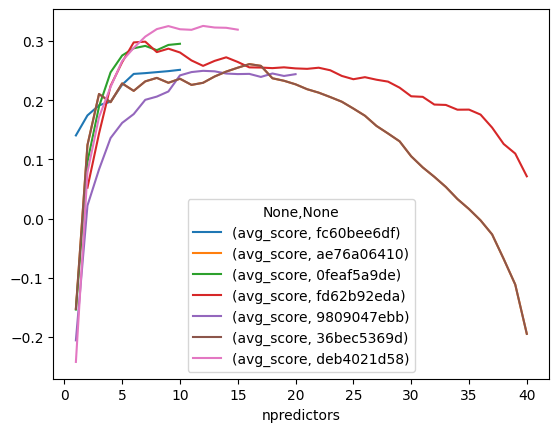

In [5]:
test.unstack(0).plot()

In [6]:
return_unique_values('firstmonth') # Reason for the worse score is including december

{1: ['36bec5369d',
  'fc60bee6df',
  '561c0adbb8',
  '41eb223566',
  'ae76a06410',
  'deb4021d58',
  '6034f0405d',
  '0feaf5a9de',
  'fd62b92eda'],
 12: ['9809047ebb']}

In [7]:
return_unique_values('n') # as both the best and the worst have n = 3

{1: ['36bec5369d',
  'fc60bee6df',
  '561c0adbb8',
  '41eb223566',
  'ae76a06410',
  '6034f0405d',
  '0feaf5a9de',
  'fd62b92eda'],
 3: ['9809047ebb', 'deb4021d58']}

In [8]:
return_unique_values('max_depth') # Reason strong decline after 7 predictors seems to be deepest trees.

{10: ['9809047ebb', 'deb4021d58', '0feaf5a9de'],
 5: ['6034f0405d'],
 15: ['fd62b92eda']}

In [9]:
return_unique_values('min_samples_split')

{0.01: ['9809047ebb', '6034f0405d', 'fd62b92eda'], 0.001: ['deb4021d58']}

In [3]:
df_forward, sc = load_pred_results('deb4021d58')

<Axes: xlabel='npredictors'>

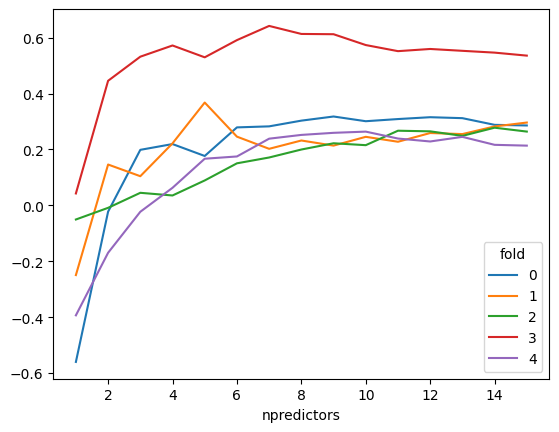

In [4]:
sc.plot()

In [5]:
df_forward.loc[10,'feature_names']

((('enso', 34, 'ersstv5'), -1),
 (('nao', 0, 'ncep'), -2),
 (('nao', 0, 'station'), -1),
 (('snao', 0, 'ncep'), -1),
 (('ao', 0, 'ncep'), -1),
 (('med_u250_latmax', 0, 'era5'), -1),
 (('med_u250', 20, 'era5'), -1),
 (('med_u250', 40, 'era5'), -3),
 (('med_u500', 50, 'era5'), -1),
 (('med_u500', 60, 'era5'), -1))

In [12]:
df_forward.loc[5,'feature_names']

((('enso', 34, 'ersstv5'), -1),
 (('nao', 0, 'station'), -1),
 (('ao', 0, 'ncep'), -1),
 (('med_u250', 20, 'era5'), -1),
 (('med_u500', 60, 'era5'), -1))

In [27]:
df_backward, sc_backward = load_pred_results('fd62b92eda')

In [8]:
df_backward.loc[5,'feature_names']

((('enso', 34, 'ersstv5'), -1),
 (('med_u250_latmax', 0, 'era5'), -1),
 (('atl_u250', 30, 'era5'), -1),
 (('med_u500', 20, 'era5'), -1),
 (('med_u500', 60, 'era5'), -1))

In [16]:
return_experiments('fc60bee6df')

{'fc60bee6df': {'prep_kwargs': {'target_region': {'include': {'iberia': [-9.8,
      35.98,
      8,
      44.6],
     'italy': [8, 35, 18, 45.63]},
    'exclude': {'north_africa': [-1.45, 34.457, 11.217, 36.972],
     'eastadriatic': [15, 43, 20, 48],
     'tunesia': [5, 30, 12, 38],
     'pyrenees': [-2, 41.8, 3.7, 45.63]}},
   'target_var': 'SPI3',
   'minsamples': 10,
   'resampling': 'multi',
   'resampling_kwargs': {'precursor_agg': 1,
    'n': 1,
    'separation': 0,
    'target_agg': 1,
    'firstmonth': 1,
    'lastmonth': 3}},
  'bottleneck_kwargs': {'startyear': 1950,
   'endyear': 2023,
   'fraction_valid': 0.8},
  'cv_kwargs': {'n_temporal': 5},
  'estimator': 'linreg',
  'estimator_kwargs': {},
  'sequential_kwargs': {'k_features': 10,
   'forward': True,
   'scoring': 'r2',
   'n_jobs': 10}}}

In [18]:
df_linreg, sc_linreg = load_pred_results('fc60bee6df')

<Axes: xlabel='npredictors'>

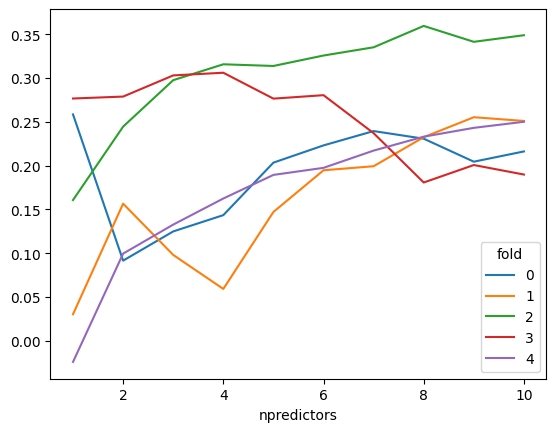

In [20]:
sc_linreg.plot()

In [26]:
df_linreg.loc[1,'feature_names']

((('ao', 0, 'trenb'), -1),)